### 전국 인구소멸 위기 지역 카토그램 만들기

- 이상호 한국고용정보원 연구원의 <한국의 지방소멸에 관한 7가지 분석> 보고서
- 인구 소멸 지역의 정의 : 65세 이상 노인 인구와 20~39세 여성 인구를 비교해서 
- 젊은 여성 인구가 노인 인구의 절반에 미달할 경우 인구 소멸 위험 징역으로 분류

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 

import folium
import json
import warnings
warnings.filterwarnings('ignore')

import draw_korea_util as dku

##### 1. 전처리 완료된 데이터 가져오기

In [37]:
pop = pd.read_csv('data/인구소멸데이터전처리완료.csv')
pop.head()

,광역시도,시도,20~39세 여자,20~39세 합계,65세이상 합계,인구수 남자,인구수 여자,인구수 합계,소멸비율,소멸위기지역,소멸위기고위험지역,ID
0,강원도,강릉시,21100,46408,44446,103184,103773,206957,0.474733,True,False,강릉
1,강원도,고성군,1664,4091,7593,12308,12024,24332,0.219149,True,False,고성(강원)
2,강원도,동해시,7108,15787,17973,42773,41968,84741,0.395482,True,False,동해
3,강원도,삼척시,4887,11432,15952,30564,29489,60053,0.306357,True,False,삼척
4,강원도,속초시,7236,16028,15825,38733,39337,78070,0.457251,True,False,속초


In [38]:
pop.isna().sum()

광역시도         0
시도           0
20~39세 여자    0
20~39세 합계    0
65세이상 합계     0
인구수 남자       0
인구수 여자       0
인구수 합계       0
소멸비율         0
소멸위기지역       0
소멸위기고위험지역    0
ID           0
dtype: int64

In [39]:
pop_folium = pop.set_index('ID')
pop_folium.head()

,광역시도,시도,20~39세 여자,20~39세 합계,65세이상 합계,인구수 남자,인구수 여자,인구수 합계,소멸비율,소멸위기지역,소멸위기고위험지역
ID,,,,,,,,,,,
강릉,강원도,강릉시,21100,46408,44446,103184,103773,206957,0.474733,True,False
고성(강원),강원도,고성군,1664,4091,7593,12308,12024,24332,0.219149,True,False
동해,강원도,동해시,7108,15787,17973,42773,41968,84741,0.395482,True,False
삼척,강원도,삼척시,4887,11432,15952,30564,29489,60053,0.306357,True,False
속초,강원도,속초시,7236,16028,15825,38733,39337,78070,0.457251,True,False


In [40]:
pop_folium.index.values

array(['강릉', '고성(강원)', '동해', '삼척', '속초', '양구', '양양', '영월', '원주', '인제',
       '정선', '철원', '춘천', '태백', '평창', '홍천', '화천', '횡성', '가평', '과천', '광명',
       '광주', '구리', '군포', '수원 권선', '용인 기흥', '김포', '남양주', '안산 단원', '고양 덕양',
       '동두천', '안양 동안', '안양 만안', '부천', '성남 분당', '안산 상록', '성남 수정', '용인 수지',
       '시흥', '안성', '양주', '양평', '여주', '연천', '수원 영통', '오산', '의왕', '의정부',
       '이천', '고양 일산동', '고양 일산서', '수원 장안', '성남 중원', '용인 처인', '파주', '수원 팔달',
       '평택', '포천', '하남', '화성', '거제', '거창', '고성(경남)', '김해', '남해', '창원 합포',
       '창원 회원', '밀양', '사천', '산청', '창원 성산', '양산', '의령', '창원 의창', '진주',
       '창원 진해', '창녕', '통영', '하동', '함안', '함양', '합천', '경산', '경주', '고령',
       '구미', '군위', '김천', '포항 남구', '문경', '봉화', '포항 북구', '상주', '성주', '안동',
       '영덕', '영양', '영주', '영천', '예천', '울릉', '울진', '의성', '청도', '청송', '칠곡',
       '광주 광산', '광주 남구', '광주 동구', '광주 북구', '광주 서구', '대구 남구', '대구 달서',
       '대구 달성', '대구 동구', '대구 북구', '대구 서구', '대구 수성', '대구 중구', '대전 대덕',
       '대전 동구', '대전 서구', '대전 유성', '대전 중구', '부산 강서', '부산 금정', '

In [41]:
# 각 도시 경계값 가져오기
geo_path = 'data/05. skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))

In [42]:
gmap = folium.Map(location=[36.2002, 127.054], zoom_start=7)

folium.Choropleth(geo_data=geo_data, 
               data=pop_folium['인구수 합계'],
               columns = [pop_folium.index, pop_folium['인구수 합계']],
               fill_color='YlGnBu', #PuRd, YlGnBu
               key_on='feature.id'
).add_to(gmap)

title_html='<h3 align="center" style="font-size:20px;">전국 인구</h3>'
gmap.get_root().html.add_child(folium.Element(title_html))
gmap


##### 2. Catogram으로 우리나라 지도 만들기

In [43]:
draw_korea_raw = pd.read_excel('data/draw_korea_raw(2021).xlsx')
draw_korea_raw


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,춘천,인제,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,파주,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,NaN,고양 일산서,고양 덕양,서울 강북,서울 성북,가평,구리,양평,평창,강릉,NaN,NaN
4,NaN,NaN,김포,광명,서울 은평,서울 서대문,서울 종로,서울 동대문,서울 중랑,여주,정선,동해,NaN,NaN
5,NaN,인천 강화,부천,안양 만안,서울 강서,서울 마포,서울 중구,서울 성동,서울 강동,이천,원주,삼척,NaN,NaN
6,NaN,인천 서구,인천 동구,안양 동안,서울 양천,서울 동작,서울 용산,서울 광진,서울 송파,하남,영월,울진,NaN,NaN
7,NaN,NaN,인천 계양,시흥,서울 금천,서울 영등포,서울 서초,서울 강남,성남 중원,광주,태백,봉화,NaN,NaN
8,NaN,NaN,인천 부평,안산 상록,서울 구로,서울 관악,과천,성남 분당,성남 수정,용인 처인,영주,영양,NaN,울릉
9,NaN,인천 중구,인천 미추홀,안산 단원,군포,의왕,수원 권선,수원 영통,용인 수지,용인 기흥,예천,영덕,NaN,NaN


In [44]:
# stack() : 열을 피벗화하여 하위 인덱스로 변환하는 메서드
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked

0
0  7       철원
   8       화천
   9       양구
   10  고성(강원)
1  3       양주
...       ...
24 2       장흥
   3       보성
25 2       완도
   5       제주
26 5      서귀포

[250 rows x 1 columns]

In [45]:
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked

,level_0,level_1,0
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
245,24,2,장흥
246,24,3,보성
247,25,2,완도
248,25,5,제주


In [46]:
draw_korea_raw_stacked.rename(columns={'level_0': 'y', 'level_1': 'x', 0 :'ID'}, inplace=True)
draw_korea = draw_korea_raw_stacked
draw_korea

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
245,24,2,장흥
246,24,3,보성
247,25,2,완도
248,25,5,제주


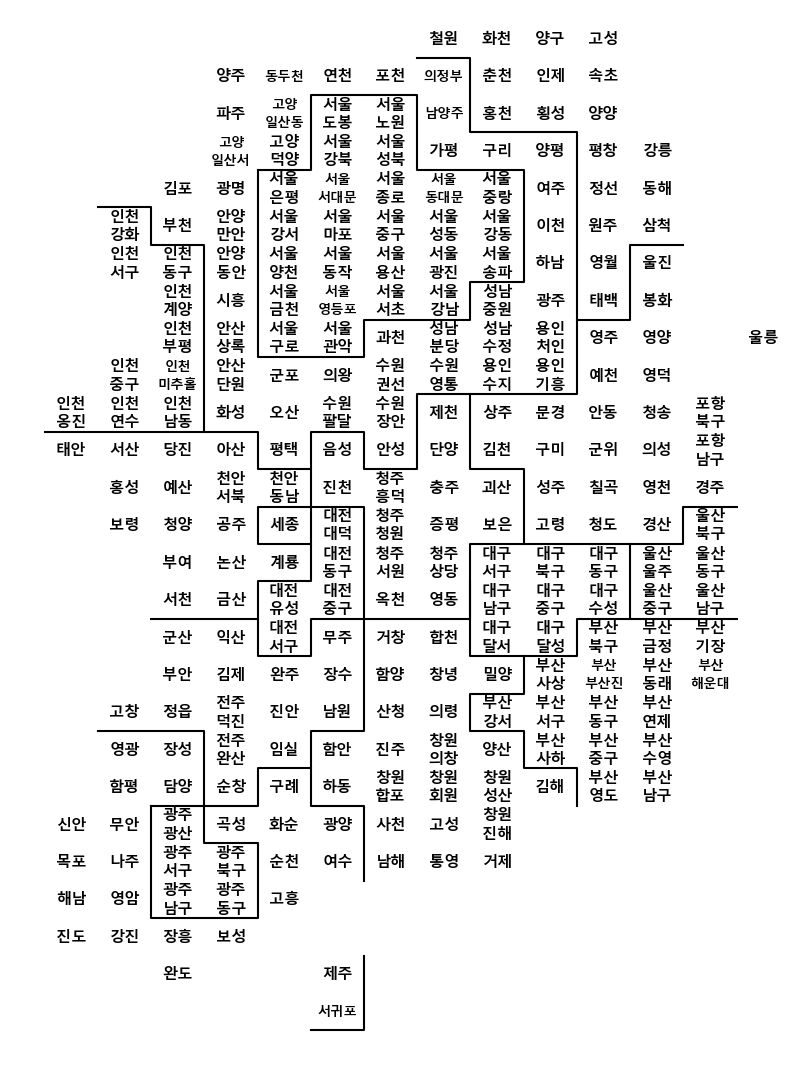

In [47]:
plt.figure(figsize=(8, 11))

# 지역 이름 표시
for idx, row in draw_korea.iterrows():
    # print(row['ID'])
    # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다.
    # (중구, 서구)
    if len(row['ID'].split()) == 2:
        dispname = f"{row['ID'].split()[0]}\n{row['ID'].split()[1]}"
    elif row['ID'][:2] == '고성':
        dispname = '고성'
    else:
        dispname = row['ID']

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에  작은 글자로 표시한다.
    # splitlines() : \n기준으로 split
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x'] + 0.5, row['y'] + 0.5), weight='bold', 
                 fontsize=fontsize, ha='center', va='center', linespacing=linespacing)
    
for path in dku.BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)
plt.gca().invert_yaxis()
plt.axis('off')
plt.tight_layout()
plt.show()

In [48]:
pop = pd.merge(pop, draw_korea, on=['ID'])
pop.head()

,광역시도,시도,20~39세 여자,20~39세 합계,65세이상 합계,인구수 남자,인구수 여자,인구수 합계,소멸비율,소멸위기지역,소멸위기고위험지역,ID,y,x
0,강원도,강릉시,21100,46408,44446,103184,103773,206957,0.474733,True,False,강릉,3,11
1,강원도,고성군,1664,4091,7593,12308,12024,24332,0.219149,True,False,고성(강원),0,10
2,강원도,동해시,7108,15787,17973,42773,41968,84741,0.395482,True,False,동해,4,11
3,강원도,삼척시,4887,11432,15952,30564,29489,60053,0.306357,True,False,삼척,5,11
4,강원도,속초시,7236,16028,15825,38733,39337,78070,0.457251,True,False,속초,1,10


- 인구 현황 및 인구 소멸 지역 확인하기

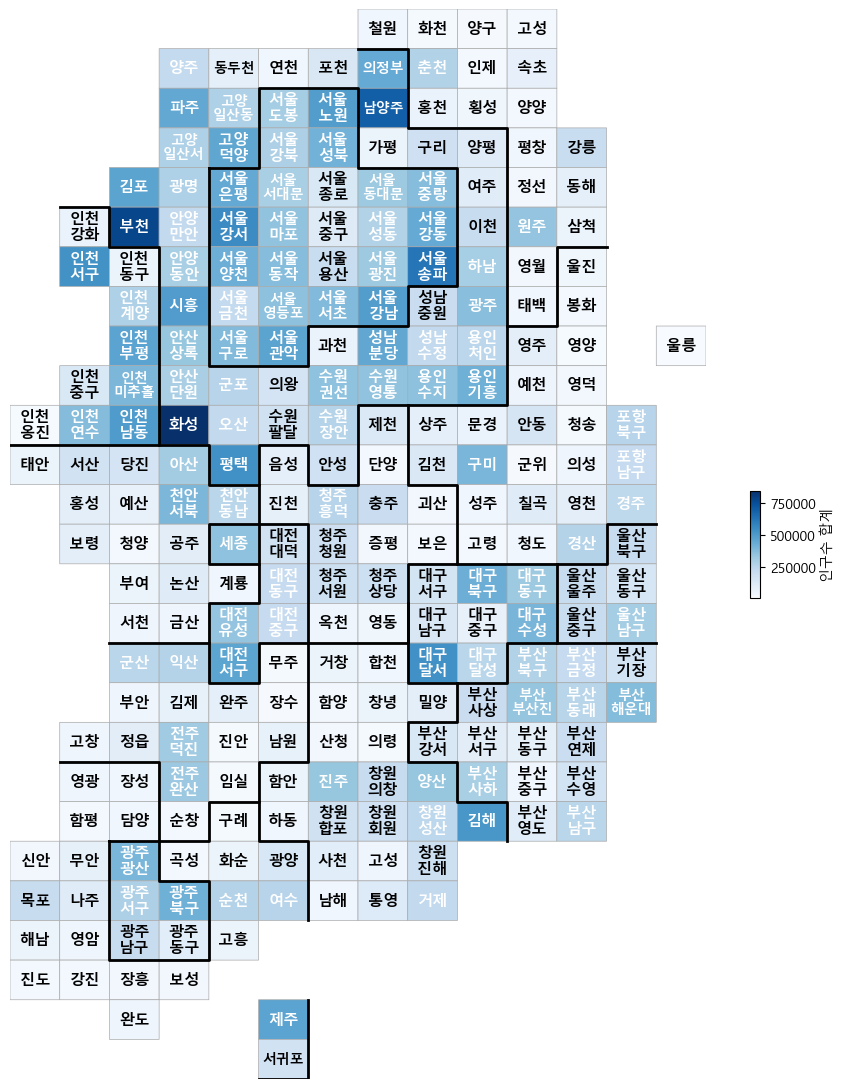

In [49]:
dku.draw_korea_map('인구수 합계', pop, 'Blues')

In [50]:
pop['소멸위기지역'] = pop['소멸위기지역'].astype(int)
pop['소멸위기고위험지역'] = pop['소멸위기고위험지역'].astype(int)

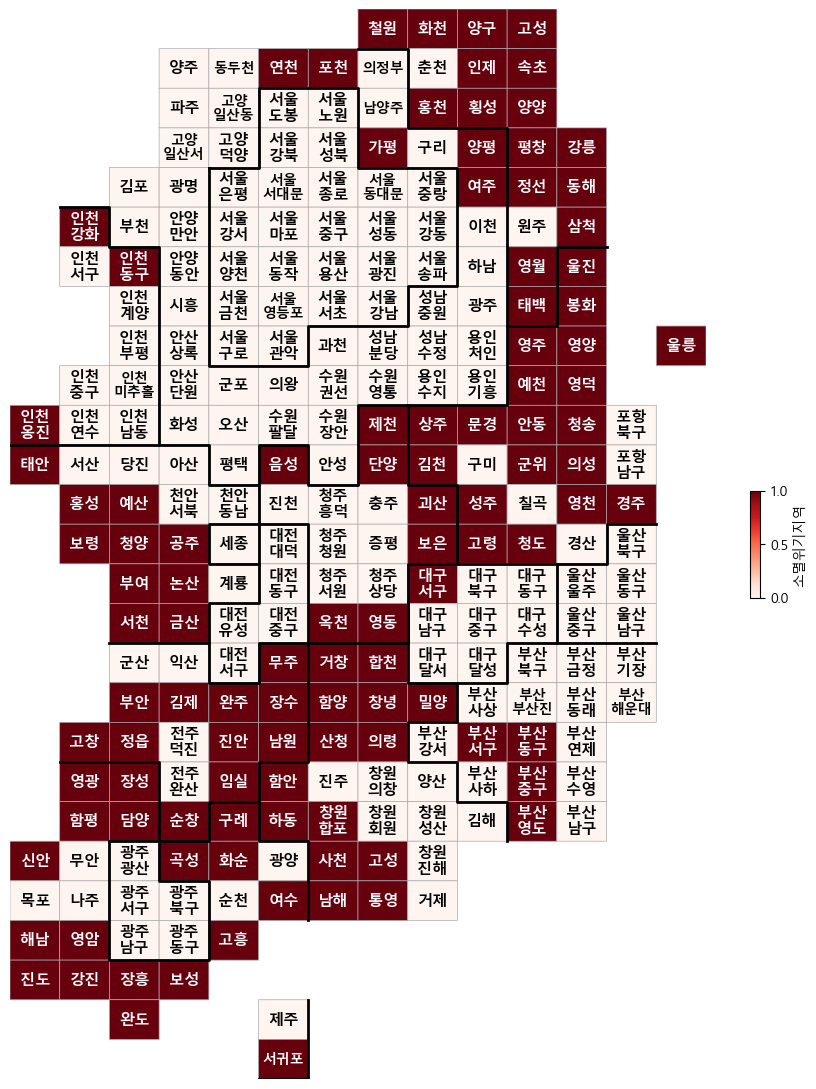

In [52]:

dku.draw_korea_map('소멸위기지역', pop, 'Reds')

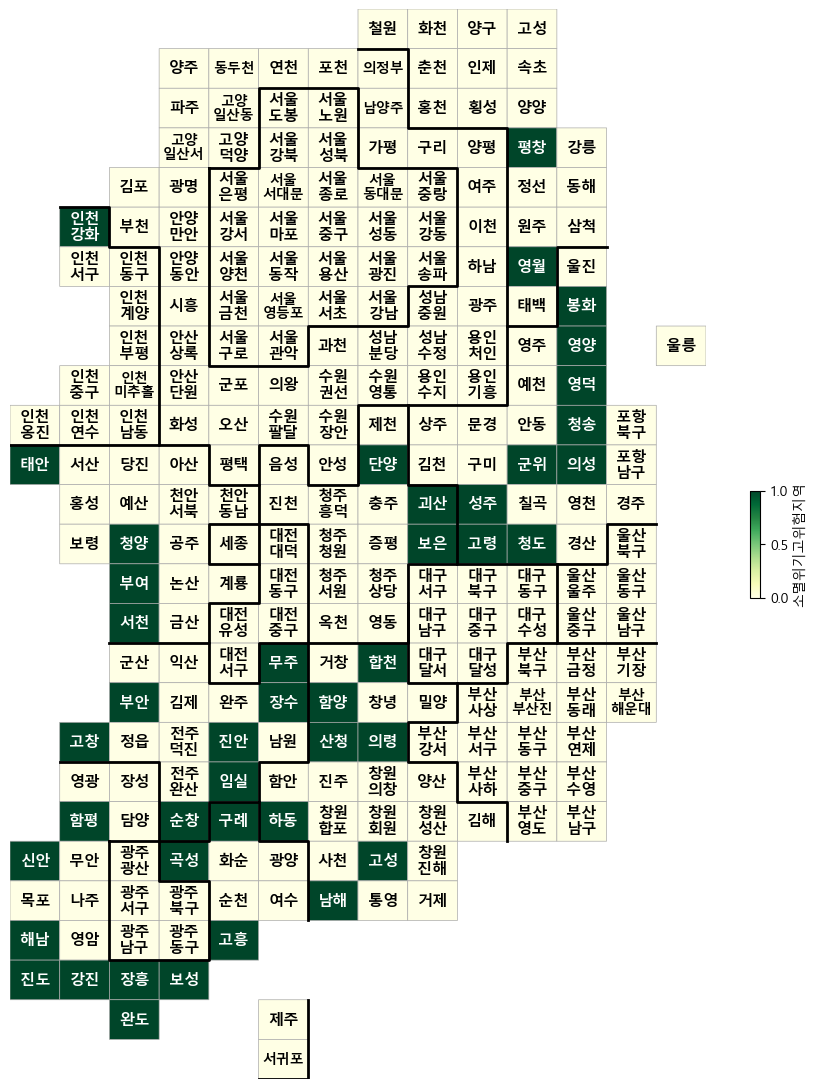

In [66]:
dku.draw_korea_map('소멸위기고위험지역', pop, 'YlGn')

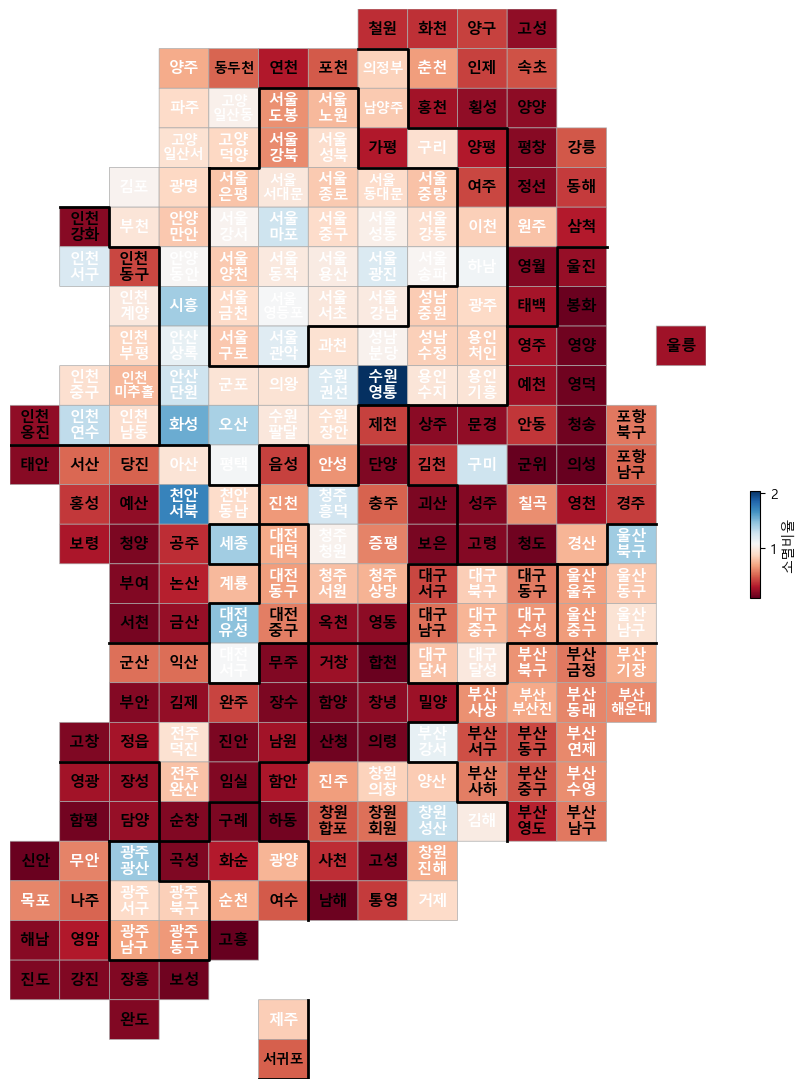

In [74]:
# 소멸비율
dku.draw_korea_map('소멸비율', pop, 'RdBu')